# Spinup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from dask.diagnostics import ProgressBar
import warnings
warnings.filterwarnings("ignore")

In [2]:
from yamlparser import YAMLParser, read_parameterized_runs, read_unparameterized_runs

In [3]:
yp = YAMLParser()

In [4]:
## read parameterized runs
exps_param = yp.read('/glade/u/home/noraloose/GL90paper/config_param.yaml')
%time exps_param = read_parameterized_runs(exps_param)

nw2_0.5deg_N15_KHTH800
nw2_0.5deg_N15_KHGL800_hbbl5
nw2_0.5deg_N15_KHTH800_vary
nw2_0.5deg_N15_KHGL800_vary_hbbl5
nw2_0.5deg_N15_EBT_KHTH800
nw2_0.5deg_N15_EBT_KHGL800_hbbl5
nw2_0.25deg_N15_KHTH300
nw2_0.25deg_N15_KHGL300_hbbl1
nw2_0.25deg_N15_KHGL300_hbbl5
nw2_0.25deg_N15_KHGL300_hbbl20
nw2_0.25deg_N15_KHGL300
nw2_0.25deg_N15_KHTH800
nw2_0.25deg_N15_KHGL800_hbbl5
nw2_0.25deg_N15_KHTH300_vary
nw2_0.25deg_N15_KHGL300_vary_hbbl5
nw2_0.25deg_N15_EBT_KHTH300
nw2_0.25deg_N15_EBT_KHGL300_hbbl5
nw2_0.125deg_N15_KHTH100
nw2_0.125deg_N15_KHGL100_hbbl5
nw2_0.125deg_N15_KHTH800
nw2_0.125deg_N15_KHGL800_hbbl5
nw2_0.125deg_N15_KHTH100_vary
nw2_0.125deg_N15_KHGL100_vary_hbbl5
nw2_0.125deg_N15_EBT_KHTH100
nw2_0.125deg_N15_EBT_KHGL100_hbbl5
CPU times: user 10.5 s, sys: 1.66 s, total: 12.2 s
Wall time: 1min 49s


In [5]:
# read unparameterized runs
exps_unparam = yp.read('/glade/u/home/noraloose/GL90paper/config_unparam.yaml')
%time exps_unparam = read_unparameterized_runs(exps_unparam)

CPU times: user 1.21 s, sys: 543 ms, total: 1.75 s
Wall time: 17.9 s


In [6]:
exp_list = [exps_param, exps_unparam]

## Spin-up plots

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'font.size': 12}
pylab.rcParams.update(params)

In [12]:
def plot_spinup(vlist, colorlist, abc_list = ['(a)', '(b)'], maxtime=77000, intertime=None, ncol=4, compute_energy_levels=False):

    fig, axs = plt.subplots(1, 2, figsize=(13,4))

    for v, color in zip(vlist, colorlist):
        print(v['label'])
        os = v['os']
        label = v['label']
        timeslice = slice(None, min(os.Time[-1], maxtime))
        os.KE.sum(dim='Layer').sel(Time=timeslice).plot(ax=axs[0], label='_none', linewidth=1.5, color=color, alpha=0.2)

        KE_rolling_mean = os.KE.sum(dim='Layer').rolling(Time=100, center=True).mean()
        KE_rolling_mean.sel(Time=timeslice).plot(ax=axs[0], label=label, linewidth=3, color=color)

        os.APE.sum(dim='Interface').sel(Time=timeslice).plot(ax=axs[1] ,label=label, linewidth=3, color=color)
        
        if compute_energy_levels:
            KE_mean = os.KE.sum(dim='Layer').sel(Time=slice(maxtime-2000, maxtime)).mean(dim='Time').values
            KE_std_dev = np.sqrt(
                (os.KE.sum(dim='Layer').sel(Time=slice(maxtime-2000, maxtime)) - KE_mean)**2
            ).mean(dim='Time').values
            print('KE mean: %g; KE std dev: %g' %(KE_mean, KE_std_dev))
            APE_mean = os.APE.sum(dim='Interface').sel(Time=slice(maxtime-2000, maxtime)).mean(dim='Time').values
            APE_std_dev = np.sqrt(
                (os.APE.sum(dim='Interface').sel(Time=slice(maxtime-2000, maxtime)) - APE_mean)**2
            ).mean(dim='Time').values
            print('APE mean: %g; APE std dev: %g' %(APE_mean, APE_std_dev))        

    axs[0].set(ylabel = 'Joules', xlabel = 'Time (days)', title='%s Kinetic Energy' %abc_list[0])
    axs[1].set(ylabel = 'Joules', xlabel = 'Time (days)', title='%s Available Potential Energy' %abc_list[1])

    axs[1].legend(bbox_to_anchor=(-0.2, -0.28), loc="center", fontsize=14, ncol=ncol)

    axs[0].grid()
    axs[1].grid()
    axs[0].ticklabel_format(useMathText=True)
    axs[1].ticklabel_format(useMathText=True)
    
    axs[0].axvspan(maxtime-2000, maxtime, facecolor='0.1', alpha=0.2)
    axs[1].axvspan(maxtime-2000, maxtime, facecolor='0.1', alpha=0.2)
    if intertime:
        axs[0].axvspan(intertime-2000, intertime, facecolor='0.1', alpha=0.2)
        axs[1].axvspan(intertime-2000, intertime, facecolor='0.1', alpha=0.2)
        
    axs[0].set_ylim(bottom=0)  
    axs[1].set_ylim(bottom=0)     

    axs[0].set_xlim(left=0)
    axs[1].set_xlim(left=0) 
    axs[0].set_xlim(right=maxtime+500)
    axs[1].set_xlim(right=maxtime+500)   
    
    plt.subplots_adjust(wspace=0.3)  

    return fig

### 1/2 degree main text

1/2$^\circ$ GM 800
KE mean: 2.57637e+17; KE std dev: 5.90666e+15
APE mean: 1.34508e+20; APE std dev: 2.15162e+17
1/2$^\circ$ GL 800
KE mean: 2.68635e+17; KE std dev: 1.16914e+16
APE mean: 1.3412e+20; APE std dev: 2.62544e+17


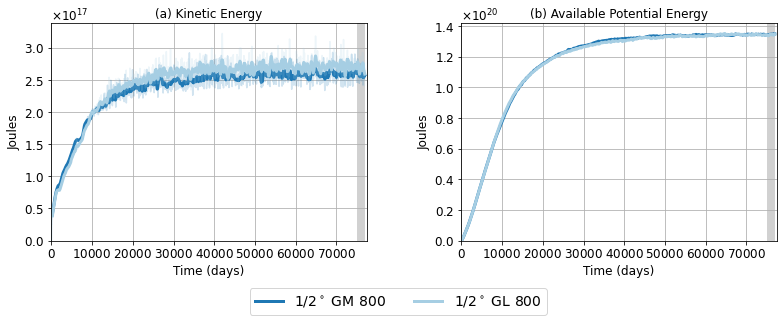

In [13]:
v = exps_param['nw2_0.5deg_N15_KHGL800_hbbl5']
v['label'] = r'1/2$^\circ$ GL 800'
v = exps_param['nw2_0.5deg_N15_KHTH800']
v['label'] = r'1/2$^\circ$ GM 800'

colorlist = ['#1f78b4', '#a6cee3']

vlist = [
    exps_param['nw2_0.5deg_N15_KHTH800'],
    exps_param['nw2_0.5deg_N15_KHGL800_hbbl5']
]

maxtime = 77000
abc_list = ['(a)', '(b)']

fig = plot_spinup(vlist, colorlist, abc_list=abc_list, maxtime=maxtime, intertime=None, ncol=4, compute_energy_levels=True)
plt.savefig('/glade/u/home/noraloose/GL90paper/figures/spinup_0.5degree.png', dpi=200, bbox_inches='tight', pad_inches=0)

#### Difference in mean

In [17]:
2.68635e+17 / 2.57637e+17  # KE ratio

1.0426879679549133

In [18]:
1.3412e+20 / 1.34508e+20  # APE ratio

0.9971154132096233

#### Difference in standard deviation

In [14]:
1.16914e+16 / 5.90666e+15  # KE ratio

1.979358893181595

In [15]:
2.62544e+17 / 2.15162e+17  # APE ratio

1.2202154655561857

### 1/2 degree appendix

1/2$^\circ$ GM 800 $\cdot\, \phi(z)$
KE mean: 2.97065e+17; KE std dev: 1.28954e+16
APE mean: 1.05368e+20; APE std dev: 2.20174e+17
1/2$^\circ$ GL 800 $\cdot\, \phi(z)$
KE mean: 3.1623e+17; KE std dev: 1.04425e+16
APE mean: 1.04713e+20; APE std dev: 1.3762e+17
1/2$^\circ$ GM 800 $\cdot\, \psi(y)$
KE mean: 1.48416e+17; KE std dev: 6.81509e+15
APE mean: 8.70149e+19; APE std dev: 1.57108e+17
1/2$^\circ$ GL 800 $\cdot\, \psi(y)$
KE mean: 1.50181e+17; KE std dev: 5.61343e+15
APE mean: 8.66894e+19; APE std dev: 1.20452e+17


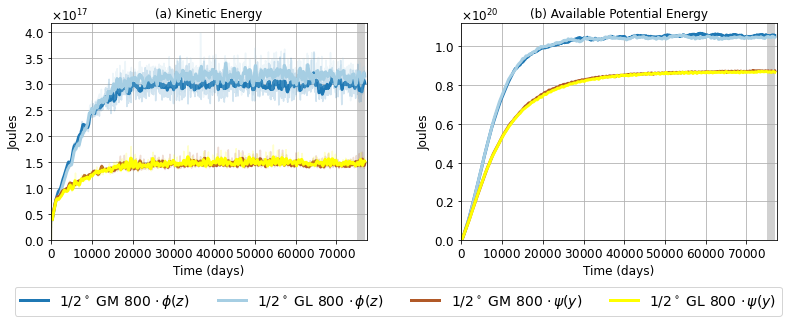

In [16]:
v = exps_param['nw2_0.5deg_N15_KHGL800_vary_hbbl5']
v['label'] = r'1/2$^\circ$ GL 800 $\cdot\, \psi(y)$'
v = exps_param['nw2_0.5deg_N15_KHTH800_vary']
v['label'] = r'1/2$^\circ$ GM 800 $\cdot\, \psi(y)$'
v = exps_param['nw2_0.5deg_N15_EBT_KHGL800_hbbl5']
v['label'] = r'1/2$^\circ$ GL 800 $\cdot\, \phi(z)$'
v = exps_param['nw2_0.5deg_N15_EBT_KHTH800']
v['label'] = r'1/2$^\circ$ GM 800 $\cdot\, \phi(z)$'

colorlist = [ '#1f78b4','#a6cee3', '#b15928', 'yellow']

vlist = [
    exps_param['nw2_0.5deg_N15_EBT_KHTH800'],
    exps_param['nw2_0.5deg_N15_EBT_KHGL800_hbbl5'],
    exps_param['nw2_0.5deg_N15_KHTH800_vary'],
    exps_param['nw2_0.5deg_N15_KHGL800_vary_hbbl5']
]

maxtime = 77000
abc_list = ['(a)', '(b)']


fig = plot_spinup(vlist, colorlist, abc_list=abc_list, maxtime=maxtime, intertime=None, ncol=4, compute_energy_levels=True)
figname = '/glade/u/home/noraloose/GL90paper/figures/spinup_0.5degree_appendix.png'
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)

#### Difference in mean

In [15]:
3.1623e+17 / 2.97065e+17  # KE ratio EBT

1.0645145001935603

In [16]:
1.04713e+20 / 1.05368e+20  # APE ratio EBT

0.9937836914433225

In [17]:
1.50181e+17 / 1.48416e+17  # KE ratio vary

1.011892248814144

In [18]:
8.66894e+19 / 8.70149e+19  # APE ratio vary

0.9962592613448961

#### Difference in std dev

In [17]:
1.04425e+16 / 1.28954e+16  # KE ratio EBT

0.809784884532469

In [18]:
1.3762e+17 / 2.20174e+17  # APE ratio EBT

0.6250510959513839

In [19]:
5.61343e+15 / 6.81509e+15  # KE ratio vary

0.8236765765382409

In [20]:
1.20452e+17 / 1.57108e+17  # APE ratio vary

0.7666827914555593

### 1/4 degree main text

1/4$^\circ$ no param
KE mean: nan; KE std dev: nan
APE mean: nan; APE std dev: nan
1/4$^\circ$ GM 300
KE mean: 5.78916e+17; KE std dev: 2.6629e+16
APE mean: 1.1131e+20; APE std dev: 2.82205e+17
1/4$^\circ$ GL 300
KE mean: 5.88242e+17; KE std dev: 3.22643e+16
APE mean: 1.09834e+20; APE std dev: 3.65607e+17
1/4$^\circ$ GM 800
KE mean: 4.03461e+17; KE std dev: 1.81787e+16
APE mean: 1.0408e+20; APE std dev: 2.4516e+17
1/4$^\circ$ GL 800
KE mean: 4.16508e+17; KE std dev: 1.86681e+16
APE mean: 1.04822e+20; APE std dev: 3.1295e+17


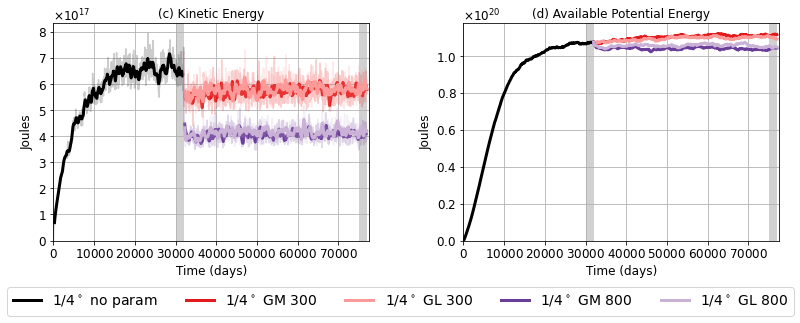

In [21]:
v = exps_param['nw2_0.25deg_N15_KHGL300_hbbl5']
v['label'] = r'1/4$^\circ$ GL 300'
v = exps_param['nw2_0.25deg_N15_KHGL800_hbbl5']
v['label'] = r'1/4$^\circ$ GL 800'
v = exps_param['nw2_0.25deg_N15_KHTH800']
v['label'] = r'1/4$^\circ$ GM 800'
v = exps_unparam['nw2_0.25deg_N15_baseline_hmix20']
v['label'] = r'1/4$^\circ$ no param'

colorlist = ['k', '#e31a1c', '#fb9a99', '#6a3d9a','#cab2d6', ]

vlist = [
    exps_unparam['nw2_0.25deg_N15_baseline_hmix20'],
    exps_param['nw2_0.25deg_N15_KHTH300'],
    exps_param['nw2_0.25deg_N15_KHGL300_hbbl5'],
    exps_param['nw2_0.25deg_N15_KHTH800'],
    exps_param['nw2_0.25deg_N15_KHGL800_hbbl5'],
]

maxtime = 77000
intertime = 32000
abc_list = ['(c)', '(d)']

fig = plot_spinup(vlist, colorlist, abc_list=abc_list, maxtime=maxtime, intertime=intertime, ncol=5, compute_energy_levels=True)
figname = '/glade/u/home/noraloose/GL90paper/figures/spinup_0.25degree.png'
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)

#### Differences in mean

In [26]:
5.88242e+17 / 5.78916e+17  # KE ratio 300

1.0161094182921184

In [28]:
1.09834e+20 / 1.1131e+20  # APE ratio 300

0.9867397358727877

In [29]:
4.16508e+17 / 4.03461e+17  # KE ratio 800

1.0323376980674712

In [30]:
1.04822e+20 / 1.0408e+20  # APE ratio 800

1.0071291314373558

#### Differences in std dev

In [27]:
3.22643e+16 / 2.6629e+16  # KE ratio 300

1.2116226670171617

In [23]:
3.65607e+17 / 2.82205e+17  # APE ratio 300

1.2955369323718573

In [24]:
1.86681e+16 / 1.81787e+16  # KE ratio 800

1.0269216170573254

In [25]:
3.1295e+17 / 2.4516e+17  # APE ratio 800

1.2765132974384075

### 1/4 degree appendix

_none
KE mean: nan; KE std dev: nan
APE mean: nan; APE std dev: nan
1/4$^\circ$ GM 300 $\cdot\, \phi(z)$
KE mean: 6.3666e+17; KE std dev: 2.25981e+16
APE mean: 1.00702e+20; APE std dev: 1.34959e+17
1/4$^\circ$ GL 300 $\cdot\, \phi(z)$
KE mean: 6.54019e+17; KE std dev: 2.89577e+16
APE mean: 1.00361e+20; APE std dev: 3.0358e+17
1/4$^\circ$ GM 300 $\cdot\, \psi(y)$
KE mean: 4.05145e+17; KE std dev: 1.39303e+16
APE mean: 1.00635e+20; APE std dev: 2.18602e+17
1/4$^\circ$ GL 300 $\cdot\, \psi(y)$
KE mean: 3.99996e+17; KE std dev: 8.65541e+15
APE mean: 9.8436e+19; APE std dev: 1.1555e+17


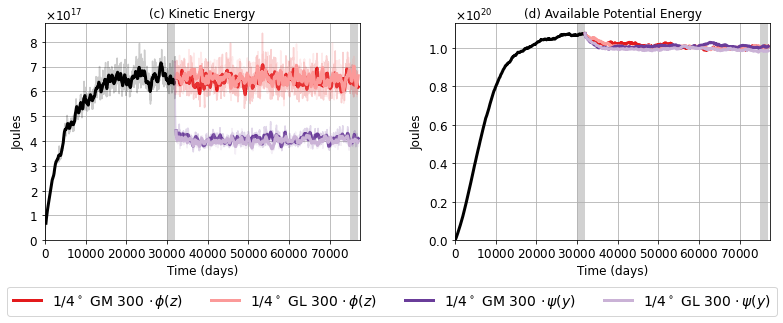

In [31]:
v = exps_param['nw2_0.25deg_N15_EBT_KHGL300_hbbl5']
v['label'] = r'1/4$^\circ$ GL 300 $\cdot\, \phi(z)$'
v = exps_param['nw2_0.25deg_N15_EBT_KHTH300']
v['label'] = r'1/4$^\circ$ GM 300 $\cdot\, \phi(z)$'
v = exps_unparam['nw2_0.25deg_N15_baseline_hmix20']
v['label'] = '_none'

v = exps_param['nw2_0.25deg_N15_KHGL300_vary_hbbl5']
v['label'] = r'1/4$^\circ$ GL 300 $\cdot\, \psi(y)$'
v = exps_param['nw2_0.25deg_N15_KHTH300_vary']
v['label'] = r'1/4$^\circ$ GM 300 $\cdot\, \psi(y)$'

colorlist = ['k', '#e31a1c', '#fb9a99', '#6a3d9a','#cab2d6', ]

vlist = [
    exps_unparam['nw2_0.25deg_N15_baseline_hmix20'],
    exps_param['nw2_0.25deg_N15_EBT_KHTH300'],
    exps_param['nw2_0.25deg_N15_EBT_KHGL300_hbbl5'],
    exps_param['nw2_0.25deg_N15_KHTH300_vary'],
    exps_param['nw2_0.25deg_N15_KHGL300_vary_hbbl5']  
]

maxtime = 77000
intertime = 32000
abc_list = ['(c)', '(d)']

fig = plot_spinup(vlist, colorlist, abc_list=abc_list, maxtime=maxtime, intertime=intertime, ncol=4, compute_energy_levels=True)
figname = '/glade/u/home/noraloose/GL90paper/figures/spinup_0.25degree_appendix.png'
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)

#### Differences in mean

In [32]:
6.54019e+17 / 6.3666e+17  # KE ratio 300 EBT

1.0272657305312098

In [33]:
1.00361e+20 / 1.00702e+20  # APE ratio 300 EBT

0.9966137713252964

In [40]:
3.99996e+17 / 4.05145e+17  # KE ratio 300 vary

0.9872909698996656

In [41]:
9.8436e+19 / 1.00635e+20  # APE ratio 300 vary

0.9781487554031898

#### Differences in std dev

In [42]:
2.89577e+16 / 2.25981e+16  # KE ratio 300 EBT

1.281421889450883

In [43]:
3.0358e+17 / 1.34959e+17  # APE ratio 300 EBT

2.2494238991101003

In [44]:
8.65541e+15 / 1.39303e+16  # KE ratio 300 vary

0.6213369417744055

In [45]:
1.1555e+17 / 2.18602e+17  # APE ratio 300 vary

0.5285861977475046

### 1/8 degree main text

1/8$^\circ$ no param
KE mean: nan; KE std dev: nan
APE mean: nan; APE std dev: nan
1/8$^\circ$ GM 100
KE mean: 1.25577e+18; KE std dev: 3.59959e+16
APE mean: 9.9183e+19; APE std dev: 1.09226e+17
1/8$^\circ$ GL 100
KE mean: 1.25145e+18; KE std dev: 4.33574e+16
APE mean: 9.776e+19; APE std dev: 2.65954e+17
1/8$^\circ$ GM 800
KE mean: 5.44391e+17; KE std dev: 2.54204e+16
APE mean: 9.48372e+19; APE std dev: 1.51063e+17
1/8$^\circ$ GL 800
KE mean: 5.39716e+17; KE std dev: 1.97663e+16
APE mean: 9.56162e+19; APE std dev: 1.73921e+17


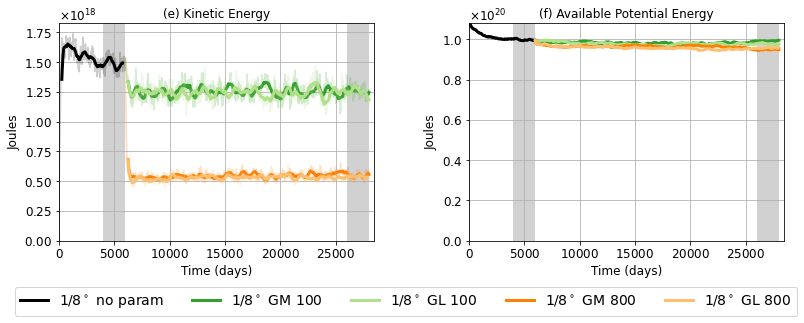

In [46]:
v = exps_param['nw2_0.125deg_N15_KHGL100_hbbl5']
v['label'] = r'1/8$^\circ$ GL 100'
v = exps_param['nw2_0.125deg_N15_KHGL800_hbbl5']
v['label'] = r'1/8$^\circ$ GL 800'
v = exps_param['nw2_0.125deg_N15_KHTH100']
v['label'] = r'1/8$^\circ$ GM 100'
v = exps_param['nw2_0.125deg_N15_KHTH800']
v['label'] = r'1/8$^\circ$ GM 800'
v = exps_unparam['nw2_0.125deg_N15_baseline_hmix20']
v['label'] = '1/8$^\circ$ no param'

colorlist = ['k', '#33a02c', '#b2df8a','#ff7f00',  '#fdbf6f']

vlist = [
    exps_unparam['nw2_0.125deg_N15_baseline_hmix20'],
    exps_param['nw2_0.125deg_N15_KHTH100'],
    exps_param['nw2_0.125deg_N15_KHGL100_hbbl5'],
    exps_param['nw2_0.125deg_N15_KHTH800'],
    exps_param['nw2_0.125deg_N15_KHGL800_hbbl5']
]

maxtime = 28000
intertime = 6000
abc_list = ['(e)', '(f)']

fig = plot_spinup(vlist, colorlist, abc_list=abc_list, maxtime=maxtime, intertime=intertime, ncol=5, compute_energy_levels=True)
figname = '/glade/u/home/noraloose/GL90paper/figures/spinup_0.125degree.png'
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)

#### Differences in mean

In [48]:
1.25145e+18 / 1.25577e+18  # KE ratio 100

0.9965598795957858

In [49]:
9.776e+19 / 9.9183e+19  # APE ratio 100

0.9856527832390631

In [50]:
5.39716e+17 / 5.44391e+17  # KE ratio 800

0.9914124223214564

In [51]:
9.56162e+19 / 9.48372e+19  # APE ratio 800

1.0082140763329157

#### Differences in std dev

In [47]:
4.33574e+16 / 3.59959e+16  # KE ratio 100

1.2045094024597245

In [52]:
2.65954e+17 / 1.09226e+17 # APE ratio 100

2.4348964532254227

In [53]:
1.97663e+16 / 2.54204e+16  # KE ratio 800

0.7775762773205772

In [54]:
1.73921e+17 / 1.51063e+17  # APE ratio 800

1.1513143522901041

### 1/8 degree appendix

_none
KE mean: nan; KE std dev: nan
APE mean: nan; APE std dev: nan
1/8$^\circ$ GM 100 $\cdot\, \phi(z)$
KE mean: 1.32504e+18; KE std dev: 5.61209e+16
APE mean: 9.5e+19; APE std dev: 2.74918e+17
1/8$^\circ$ GL 100 $\cdot\, \phi(z)$
KE mean: 1.30604e+18; KE std dev: 4.28529e+16
APE mean: 9.52876e+19; APE std dev: 1.30781e+17
1/8$^\circ$ GM 100 $\cdot\, \psi(y)$
KE mean: 1.07096e+18; KE std dev: 3.22132e+16
APE mean: 9.70912e+19; APE std dev: 2.30843e+17
1/8$^\circ$ GL 100 $\cdot\, \psi(y)$
KE mean: 1.05913e+18; KE std dev: 2.8133e+16
APE mean: 9.70108e+19; APE std dev: 1.7739e+17


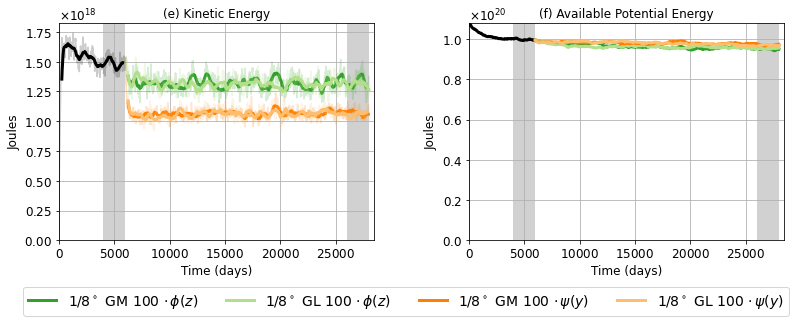

In [55]:
v = exps_param['nw2_0.125deg_N15_EBT_KHGL100_hbbl5']
v['label'] = r'1/8$^\circ$ GL 100 $\cdot\, \phi(z)$'
v = exps_param['nw2_0.125deg_N15_KHGL100_vary_hbbl5']
v['label'] = r'1/8$^\circ$ GL 100 $\cdot\, \psi(y)$'
v = exps_param['nw2_0.125deg_N15_EBT_KHTH100']
v['label'] = r'1/8$^\circ$ GM 100 $\cdot\, \phi(z)$'
v = exps_param['nw2_0.125deg_N15_KHTH100_vary']
v['label'] = r'1/8$^\circ$ GM 100 $\cdot\, \psi(y)$'
v = exps_unparam['nw2_0.125deg_N15_baseline_hmix20']
v['label'] = '_none'

colorlist = ['k', '#33a02c', '#b2df8a','#ff7f00',  '#fdbf6f']

vlist = [
    exps_unparam['nw2_0.125deg_N15_baseline_hmix20'],
    exps_param['nw2_0.125deg_N15_EBT_KHTH100'],
    exps_param['nw2_0.125deg_N15_EBT_KHGL100_hbbl5'],
    exps_param['nw2_0.125deg_N15_KHTH100_vary'],
    exps_param['nw2_0.125deg_N15_KHGL100_vary_hbbl5']
]

maxtime = 28000
intertime = 6000
abc_list = ['(e)', '(f)']

fig = plot_spinup(vlist, colorlist, abc_list=abc_list, maxtime=maxtime, intertime=intertime, ncol=4, compute_energy_levels=True)
figname = '/glade/u/home/noraloose/GL90paper/figures/spinup_0.125degree_appendix.png'
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)

#### Differences in mean

In [59]:
1.30604e+18 / 1.32504e+18  # KE ratio 100 EBT

0.9856608102396909

In [60]:
9.52876e+19 / 9.5e+19  # APE ratio 100 EBT

1.0030273684210527

In [61]:
1.05913e+18 / 1.07096e+18  # KE ratio 100 vary

0.9889538358108613

In [62]:
9.70108e+19 / 9.70912e+19  # APE ratio 100 vary

0.9991719125935203

#### Differences in std dev

In [56]:
4.28529e+16 / 5.61209e+16  # KE ratio 100 EBT

0.7635818384951061

In [57]:
1.30781e+17 / 2.74918e+17  # APE ratio 100 EBT

0.4757091205377604

In [58]:
2.8133e+16 / 3.22132e+16  # KE ratio 100 vary

0.8733376379869122

In [63]:
1.7739e+17 / 2.30843e+17  # APE ratio 100 vary

0.7684443539548524